# Análise de Dados

In [1]:
import pandas as pd # data manipulation and analysis
import seaborn as sns # data visualization
import numpy as np # linear algebra
import matplotlib.pyplot as plt # chart

In [2]:
df = pd.read_csv('Uber_Ride_Reviews.csv')

In [3]:
df.head()

,ride_review,ride_rating,sentiment
0,I completed running New York Marathon requeste...,1.0,0
1,My appointment time auto repairs required earl...,1.0,0
2,Whether I using Uber ride service Uber Eats or...,1.0,0
3,Why hard understand I trying retrieve Uber cab...,1.0,0
4,I South Beach FL I staying major hotel ordered...,1.0,0


In [4]:
df.count()

ride_review    1344
ride_rating    1344
sentiment      1344
dtype: int64

In [5]:
df.groupby(['sentiment']).size()

sentiment
0    1111
1     233
dtype: int64

# Modelos 

In [6]:
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, make_scorer

# Função para a limpeza dos dados

In [7]:
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import RSLPStemmer
from nltk.stem.porter import *
stemmer = PorterStemmer()
stemmed = nltk.stem.SnowballStemmer("english")
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PICHAU\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PICHAU\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PICHAU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
def normalizer(depoimentos):
    depoimentos = " ".join(filter(lambda x: x[0]!= '@' , depoimentos.split()))
    depoimentos = re.sub('[^a-zA-Z]', ' ', depoimentos)
    depoimentos = depoimentos.lower()
    depoimentos = depoimentos.split()
    depoimentos = [stemmer.stem(word) for word in depoimentos]
    depoimentos = [word for word in depoimentos if not word in set(stopwords.words('english'))]
    depoimentos = " ".join(depoimentos)
    return depoimentos

In [9]:
df['ride_review'] = df.ride_review.apply(normalizer) 

In [10]:
df.head()

,ride_review,ride_rating,sentiment
0,complet run new york marathon request uber poo...,1.0,0
1,appoint time auto repair requir earli avail me...,1.0,0
2,whether use uber ride servic uber eat order fo...,1.0,0
3,whi hard understand tri retriev uber cab email...,1.0,0
4,south beach fl stay major hotel order uber dri...,1.0,0


# Treino e Teste

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer
import itertools

In [35]:
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['red','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=3, alpha=.3, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color = "yellow", label = "negative")
            blue_patch = mpatches.Patch(color = 'blue',label = 'positive')
            plt.legend(handles=[red_patch, blue_patch], prop={'size': 20})

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.winter): 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title, fontsize=30) 
    plt.colorbar() 
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, fontsize=20) 
    plt.yticks(tick_marks, classes, fontsize=20) 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): 
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color= "white" if cm[i, j] < thresh else "black", fontsize=30) 
    plt.tight_layout() 
    return plt


def confusion(target, pred):
    cm = confusion_matrix(target, pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['negative','positive'], normalize=False, title='Confusion matrix')
    plt.show()

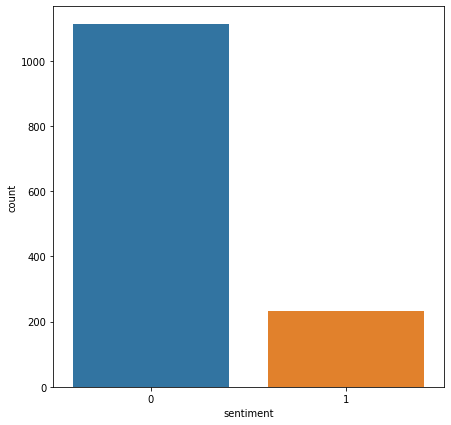

In [48]:
fig = plt.figure(figsize=(7, 7))  
sns.countplot(x='sentiment', data=df);

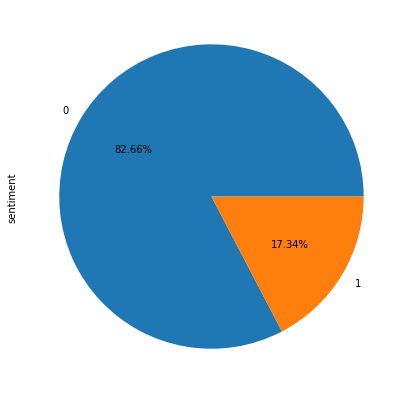

In [47]:
fig = plt.figure(figsize=(7, 7))   
df.sentiment.value_counts().plot(kind='pie', autopct='%.2f%%')

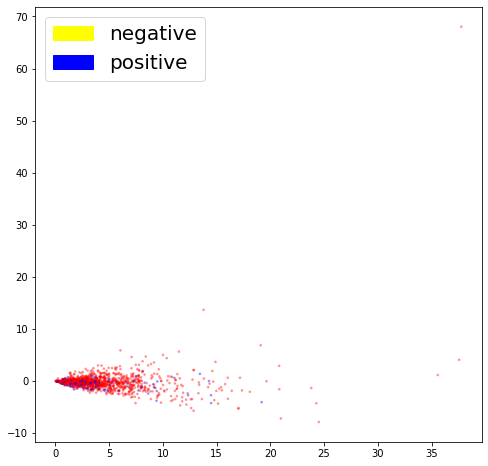

In [15]:
count = CountVectorizer(ngram_range = (1,3))
xtrain_matrix = count.fit_transform(df.ride_review)
ytrain_matrix = df.sentiment
fig = plt.figure(figsize=(8, 8))   
plot_LSA(xtrain_matrix,ytrain_matrix)

In [16]:
X = df['ride_review']
y = df['sentiment']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=7)

In [18]:
vectorizer = CountVectorizer(ngram_range = (1,3))
#vectorizer = TfidfVectorizer(min_df=10) resultado final piora
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Modelo: Máquinas de Vetores de Suporte - SVC

In [19]:
from sklearn.svm import SVC

In [62]:
param_grid = {'C':[10,100,1000],'gamma':[1,0.1,0.001,0.0001,0.00001], 'kernel':['linear','rbf']}
gridSVC = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
gridSVC.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.5s
[CV] C=10, gamma=1, kernel=linear ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.5s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.5s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.7s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.7s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.7s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.5s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.5s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   47.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [63]:
gridSVC.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [38]:
svc = SVC(C = 100 , gamma=0.001 , kernel='rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(metrics.classification_report(y_test,pred,digits=4))

              precision    recall  f1-score   support

           0     0.8992    0.9640    0.9304       222
           1     0.7419    0.4894    0.5897        47

    accuracy                         0.8810       269
   macro avg     0.8205    0.7267    0.7601       269
weighted avg     0.8717    0.8810    0.8709       269



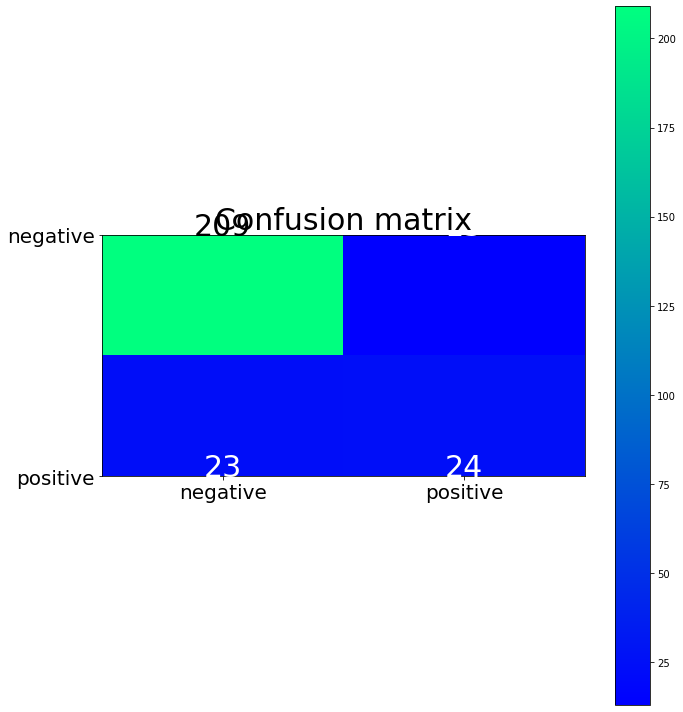

None


In [37]:
print(confusion(y_test, y_pred))

# Modelo: Regressão Linear Logística

In [66]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred = model.predict(X_test)

In [39]:
print(metrics.classification_report(y_test,pred,digits=4))

              precision    recall  f1-score   support

           0     0.8992    0.9640    0.9304       222
           1     0.7419    0.4894    0.5897        47

    accuracy                         0.8810       269
   macro avg     0.8205    0.7267    0.7601       269
weighted avg     0.8717    0.8810    0.8709       269



In [69]:
grid={"C":np.logspace(0, 4, 10), "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg_cv= GridSearchCV(LogisticRegression() , grid , cv=10, scoring=make_scorer(f1_score, average='weighted'))
logreg_cv.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
  

In [70]:
# View best hyperparameters
print(logreg_cv.best_params_)

{'C': 7.742636826811269, 'penalty': 'l2'}


In [29]:
model = LogisticRegression(penalty="l1", C=1291.5496650148827)
model.fit(X_train, y_train)

C:\Users\PICHAU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1291.5496650148827, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
pred = model.predict(X_test)

              precision    recall  f1-score   support

           0     0.8992    0.9640    0.9304       222
           1     0.7419    0.4894    0.5897        47

    accuracy                         0.8810       269
   macro avg     0.8205    0.7267    0.7601       269
weighted avg     0.8717    0.8810    0.8709       269



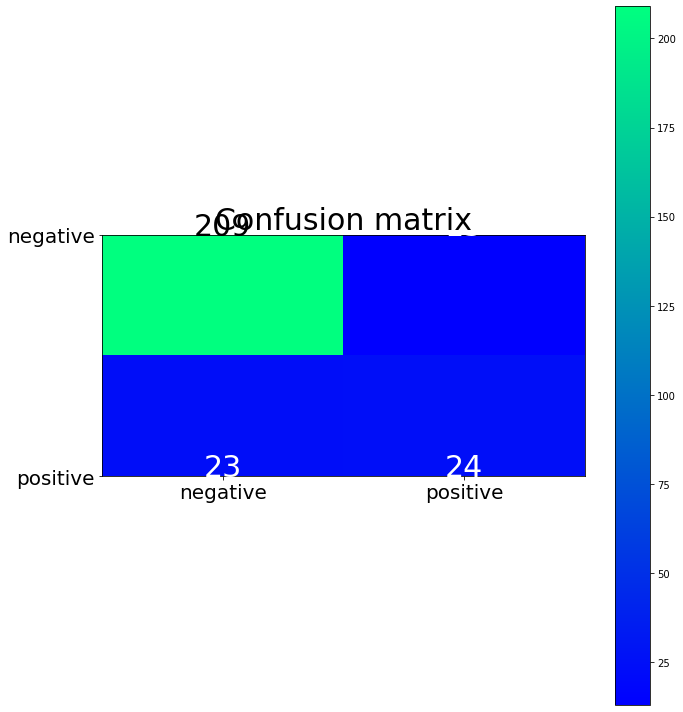

None


In [42]:
print(metrics.classification_report(y_test,pred,digits=4))
print(confusion(y_test, y_pred))

# Modelo: Multinomial Naive Bayes

In [32]:
gaussian = MultinomialNB()

In [33]:
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)

              precision    recall  f1-score   support

           0     0.9009    0.9414    0.9207       222
           1     0.6486    0.5106    0.5714        47

    accuracy                         0.8662       269
   macro avg     0.7748    0.7260    0.7461       269
weighted avg     0.8568    0.8662    0.8597       269



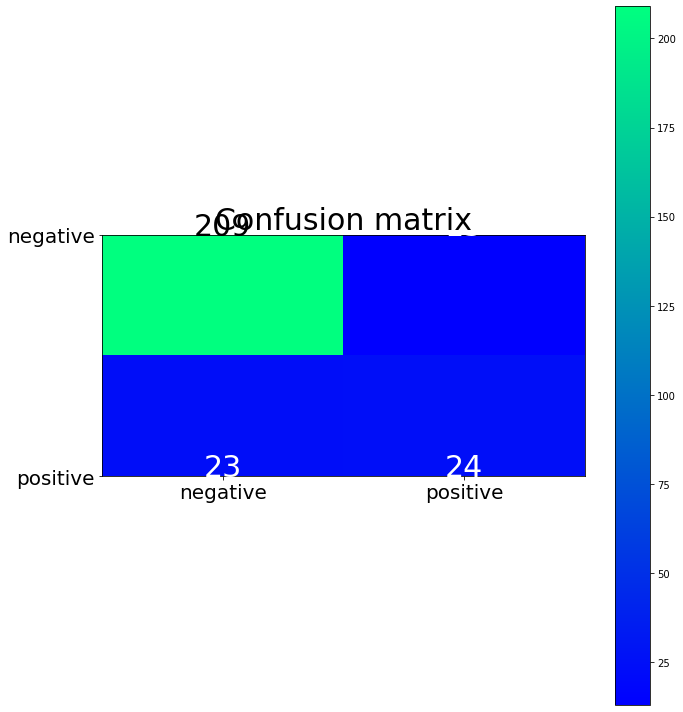

None


In [43]:
print(metrics.classification_report(y_test, y_pred,digits=4))
print(confusion(y_test, y_pred))

# Modelo: Árvore de Decisão

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
gridTree = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=10, scoring=make_scorer(f1_score, average='weighted'))
gridTree.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20,

In [79]:
# View best hyperparameters
print(gridTree.best_params_)

{'criterion': 'gini', 'max_depth': 15}


In [51]:
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

In [52]:
print(metrics.classification_report(y_test, y_pred,digits=4))


              precision    recall  f1-score   support

           0     0.8866    0.9505    0.9174       222
           1     0.6452    0.4255    0.5128        47

    accuracy                         0.8587       269
   macro avg     0.7659    0.6880    0.7151       269
weighted avg     0.8444    0.8587    0.8467       269

